In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
projectiles =       pd.read_csv(r"..\data\raw\projectiles_tables.tsv",          sep="\t", dtype=str, keep_default_na=False)

In [49]:
damage_num = pd.to_numeric(projectiles["damage"], errors="coerce")
eff_range_num = pd.to_numeric(projectiles["effective_range"], errors="coerce")

In [50]:
projectiles["damage_num"] = pd.to_numeric(projectiles["damage"], errors="coerce")
projectiles["eff_range_num"] = pd.to_numeric(projectiles["effective_range"], errors="coerce")


In [51]:
pair = projectiles[["eff_range_num", "damage_num"]].dropna()

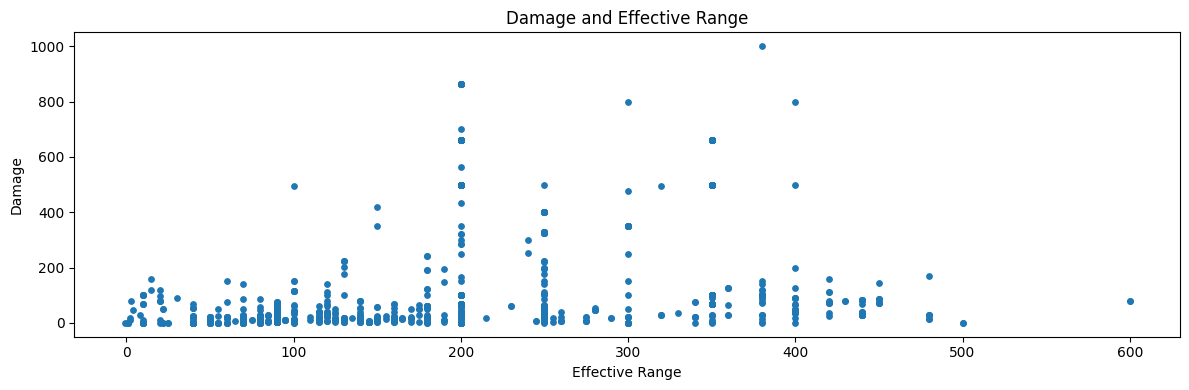

In [52]:
plt.figure(figsize=(12,4))
plt.scatter(pair["eff_range_num"], pair["damage_num"], s=15)
plt.title("Damage and Effective Range")
plt.xlabel("Effective Range")
plt.ylabel("Damage")
plt.tight_layout()
plt.show()

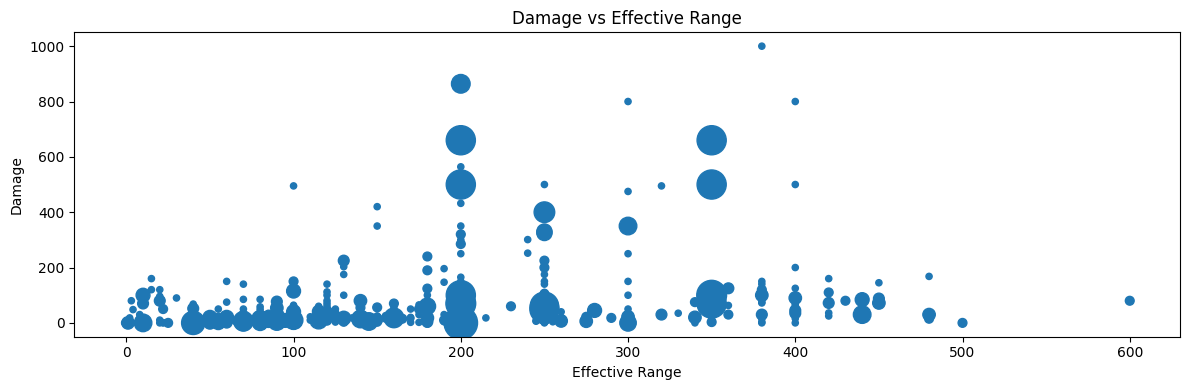

In [53]:
projectiles["damage_num"] = pd.to_numeric(projectiles["damage"], errors="coerce")
projectiles["range_num"]  = pd.to_numeric(projectiles["effective_range"], errors="coerce")

pair_counts = (
    projectiles[["range_num", "damage_num"]]
    .dropna()
    .value_counts()
    .reset_index(name="count")
)

plt.figure(figsize=(12,4))
plt.scatter(
    pair_counts["range_num"],
    pair_counts["damage_num"],
    s=pair_counts["count"] * 20  # scale factor (tune this)
)
plt.title("Damage vs Effective Range")
plt.xlabel("Effective Range")
plt.ylabel("Damage")
plt.tight_layout()
plt.show()


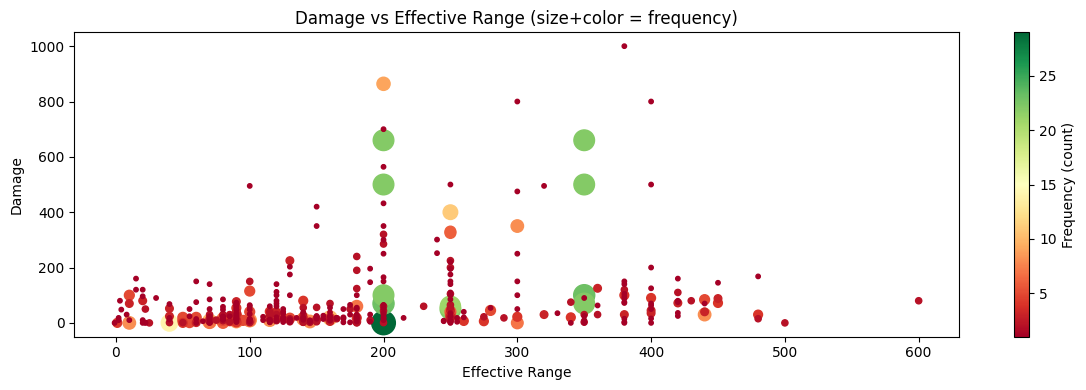

In [54]:


max_count = pair_counts["count"].max()

plt.figure(figsize=(12,4))
plt.scatter(
    pair_counts["range_num"],
    pair_counts["damage_num"],
    s=pair_counts["count"] * 10,          # bubble size scaling (tweak)
    c=pair_counts["count"],               # color maps to count
    cmap="RdYlGn",                        # red -> yellow -> green
    vmin=1, vmax=max_count                # force 1=red, max=green
)

plt.colorbar(label="Frequency (count)")
plt.title("Damage vs Effective Range (size+color = frequency)")
plt.xlabel("Effective Range")
plt.ylabel("Damage")
plt.tight_layout()
plt.show()